# A2. Models of complex networks

### Implementation of models of complex networks.
Implement generators of complex networks for, at least, two of the following models of complex networks (sorted by increasing difficulty), which must include at least one of the two last ones (BA or CM):

- Erdös-Rényi (ER) networks, either G(N,K) or G(N,p)

- Watts-Strogatz (WS) small-world model

- Barabási & Albert (BA) preferential attachment model

- Configuration Model (CM)

## Imports

In [84]:
#Libraries
%pip install igraph -q
import igraph
import matplotlib.pyplot as plt
import time 
from collections import defaultdict
import numpy as np 
from typing import List
import seaborn as sns 
import numpy as np
import networkx as nx
from pylab import rcParams

import plotly.offline as py
import plotly.graph_objects as go



Note: you may need to restart the kernel to use updated packages.


In [2]:
rcParams['figure.figsize'] = 20,12
#Variables
N = 50 
#N = 100
#N = 1000
P = 0.003
K =  3

## 1. Erdös-Rényi (ER) networks, either G(N,K) or G(N,p)
ER: different values of "K" for G(N,K), or of "p" for G(N,p), such that e.g. k=3, 6, 10

In [3]:

class ErdosRenyiGraph: 
    tic = time.time()
    """
    Function which implements a random Erdös-Rényi (ER) Graph with the given parameters
    
    PARAMS: 
    -------
    number_of_nodes : the total number of nodes in the graph 
    
    number_of_edges : total number of edges??
    
    degrees : degrees (k)
    
    probabilities : the probability that will be assigned to each new node 
    
    RETRUNS:
    --------
    
    ER_graph : A randomly generated Erdös-Rényi Graph with the defined parameters above. 
    
    """

    ## class for the randomly generated graphs like ER
    def __init__(self, number_of_nodes:int = 5, probabilities:float = 0.2):
        self.nodes = number_of_nodes
        self.probas = probabilities
        self.graph = self._start_network()
        self.edges = self._get_edges()
        self.igraph = igraph.Graph(edges=self.edges)
        self.degrees = self._calculate_degrees()

    
    def _plot_graph(self):


        return igraph.plot(self.igraph) 



    
    def _get_edges(self):
        return [(node, edge) for node in self.graph.keys() for edge in self.graph[node]]

    def _start_network(self):
        g = defaultdict(list)
        ## iterate through the number of nodes 
        for nodes in range(0,self.nodes):
            ## iterate through the possible connections (Node to Node)
            for edges in range(0,self.nodes):
                ## define whether a link exists
                if nodes < edges: 
                    link_exist = np.random.uniform(0,1) > self.probas
                    ## if it exists we append a connection to node_i 
                    if link_exist: 
                        g[nodes].append(edges)
        return g

    def _build_graph(self):
        ## start the network 
        self._start_network()
        print(f"Build the graph with {self.nodes} and {len(self.edges)} edges with a probability of {self.probas} and assigned the iGraph variable")

    ## calculate descriptors 
    # Degrees, Power Law Distribution
    def _calculate_degrees(self):
        return list(map(len,self.graph.values()))

    # theoretical graph
    def _plot_theoretical(self, graph):
        pass 
    # experimental graph 
    def _plot_experimental(self, graph):
        pass

    
    tac = time.time()
    print(f"It took {tac-tic} seconds")

    

It took 1.049041748046875e-05 seconds


Build the graph with 30 and 265 edges with a probability of 0.37 and assigned the iGraph variable


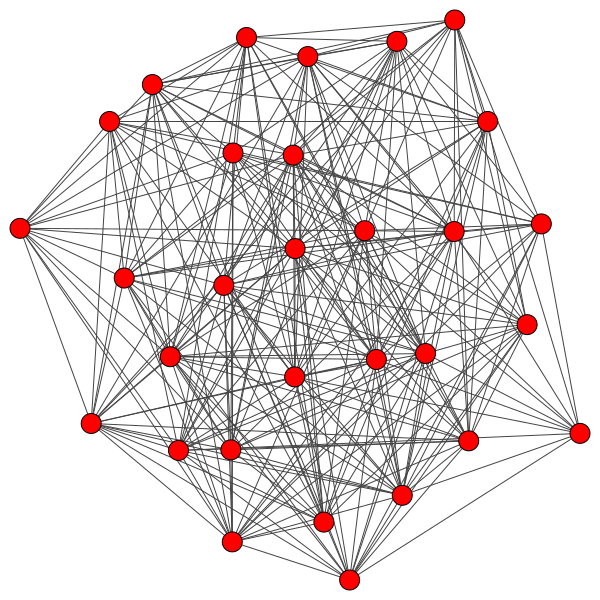

In [79]:
## Random Seed 
SEED = np.random.seed(42)
## variables 
N = 30
PROBABILITY = round(np.random.uniform(0,1), 2)
## instantiate
graph = ErdosRenyiGraph(N, PROBABILITY)
## call the constructor 
graph._build_graph()
## visualize 
graph._plot_graph()

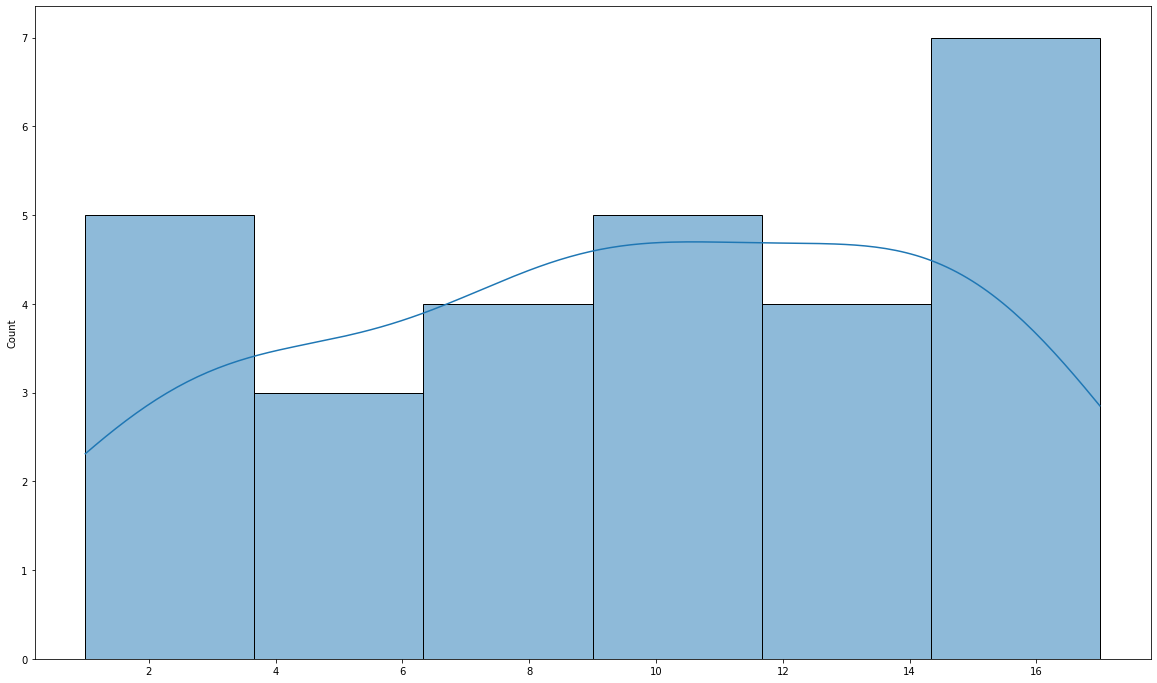

In [7]:
g = sns.histplot(graph.degrees, kde=True)
plt.show()

In [15]:

## we set a seed 
def deterministic(seed=int) -> np.random.seed:
    return np.random.seed(seed)
SEED = deterministic(42)
## instantiate an empty graph 

## number of nodes
N = 5
## number of edges 
M = 10
## get a random probability 
link_exist = 0.5 > np.random.uniform(0,1)
#print(link_exist)
## 
from typing import List
def generate_random_graph(number_of_nodes:int, probability:float) -> defaultdict(List[int]):
    """generates a random graph"""    
    ## instantiate a random graph 
    g = defaultdict(list)
    ## iterate through the number of nodes 
    for nodes in range(0,number_of_nodes):
        ## iterate through the possible connections (Node to Node)
        for edges in range(0,number_of_nodes):
            ## define whether a link exists
            if nodes < edges: 
                link_exist = np.random.uniform(0,1) > probability
                ## if it exists we append a connection to node_i 
                if link_exist: 
                    g[nodes].append(edges)
    return g

def make_graph(graph:defaultdict(List[int])) -> igraph.Graph:
    """Convert a dictionary into an igraph.Graph"""
    ## first we need to get the (nodes, edges) pairs 
    edges = [(node, edge) for node in graph.keys() for edge in graph[node]]
    ## build the igraph.Graph 
    graph = igraph.Graph(edges=edges)
    return graph 


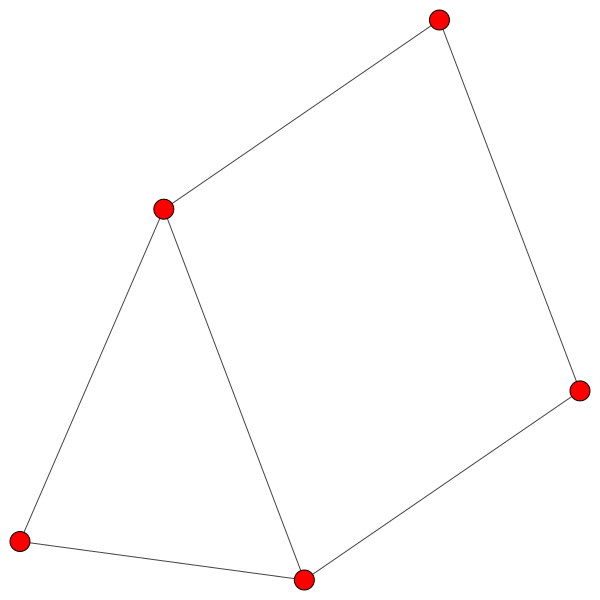

In [61]:
# We create a random graph
random_graph = generate_random_graph(N,PROBABILITY)
#Here we construct the graph with the make function
Graph_method_trwo = make_graph(random_graph)
#Plot the graph
layout = Graph_method_trwo.layout("Kamada_kawai")
igraph.plot(Graph_method_trwo, layout = layout)



## 2. Watts-Strogatz (WS) small-world model
WS: different values of <k> and "p", including p=0, e.g. p=0.0, 0.1, 0.2, 0.5, 0.9, 1.0, and <k>=2, 4, 6

## 3. Barabási & Albert (BA) preferential attachment model
BA: different values of "m" (number of edges that each new nodes forms with the existing nodes), e.g. m=1, 2, 5

## How is work Barabási:
Barabási basically, initialize its methodology with a random graph where 

## 1.Parameter definitions

Here we define the parameters as:

- n: Initial number of nodes
- m :Number of edges desire

In [63]:
"""
1. Generamos un grafo con N nodos 
2. Elegimos nodo a cual agregar nuevo nodo (degree y probabilidad)
3. agregamos nodo 
repetir 2-3 hasta llegar al tamanio querido 
----------------------------------------------------------
INPUT: 
    - m (degree per node)
    - Numero de nodos final
OUTPUT:
    - Network con numero de nodos y degree deseado 
----------------------------------------------------------
Ejemplo: 
m = 3 (m>1)
para cada nodo, repetimos paso 2, 3 veces, para tener 3 conexiones. 
y se actualiza todo para cada nuevo edge / conexion que se hace. 
"""



## Nos crea un grafo fijo
def BA_lbert(nodes):
    adjacency_matrix = np.random.randint(10, size=(nodes,nodes))
    np.fill_diagonal(adjacency_matrix, 0)
    graph = nx.from_numpy_matrix(adjacency_matrix)
    pos = nx.spring_layout(graph)
    degree_net = graph.degree()
    nx.draw_networkx(graph, with_labels=True)


    plt.title("Barabási-Albert")
    plt.show()
    
    
    return graph, adjacency_matrix

def create_empty_graph(number_nodes:int) -> np.array:
    """returns a matrix with size Nodes x Nodes"""
    return np.zeros(shape=(number_nodes, number_nodes))

def degrees_sum(graph:nx.graph.Graph) -> None:
    """returns the list of degrees and the sum of degrees"""
    ## degrees 
    degrees = np.array([x[1] for x in graph.degree])
    ## sum of degrees 
    sum_degrees = sum(degrees)
    return degrees, sum_degrees

def generate_degree_bin(degrees:np.array) -> np.array:
    """returns the binning of the degrees"""
    return np.cumsum(degrees)

def degree_sum_uniform(sum_of_degrees:int) -> float:
    """generates a random uniform value multiplied by the sum of degrees"""
    ## generate a random value 
    rand_val = np.random.uniform(0,1)
    ## return the sum of degrees * rand_val
    return sum_of_degrees * rand_val

def get_bin_index(random_value:float, bin_values:np.array) -> tuple:
    """Returns the start and end index of the bin the value corresponds"""
    ## iterate over the list with the index 
    for idx, i in enumerate(bin_values):
        ## condition 
        if random_value <= i:
            ## if the value of the index is less than 0 return 0
            start = idx-1 if (idx-1) >=0 else 0
            return (start, idx+1)

## update node to add 
def update_node_to_add(dic1,matrix):
    # Compute the degree with the matrix
    for i in range(0,len(matrix)):
        degree_for_node = matrix[i,:]
        dic1 = sum((degree_for_node > 0).astype(int))
        print(dic1)

    dic1 = degrees

    return dic1



    

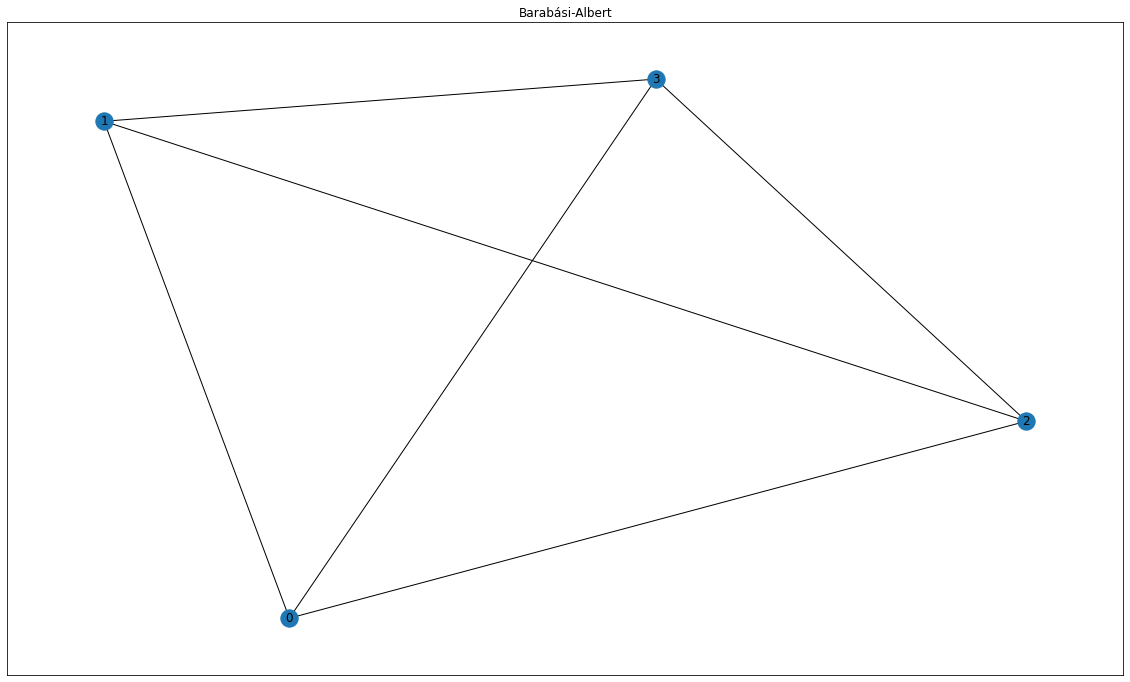

In [64]:
#PLotear inicial
k,adjacency_M = BA_lbert(4)
#Calcular degrees y sacar dictionary

degrees, sum_degree = degrees_sum(k) # degrees and their sum 
degree_bin = generate_degree_bin(degrees) ## bins of the degrees 
degree_random = degree_sum_uniform(sum_degree) ## random value * sum of degrees
val_bin = get_bin_index(degree_random, degree_bin)

In [65]:
adjacency_M

array([[0, 3, 2, 9],
       [4, 0, 2, 8],
       [3, 4, 0, 4],
       [6, 8, 6, 0]])

In [66]:
val_bin[1]

1

In [68]:
a  = create_empty_graph(100)
## asignamos la adj matrix a la ubicacion correspondiente \
s = adjacency_M.shape
a[:s[0],:s[1]] = adjacency_M
print(adjacency_M)

[[0 3 2 9]
 [4 0 2 8]
 [3 4 0 4]
 [6 8 6 0]]


In [69]:
def insert_node(adjacency_matrix:np.array,final_matrix:np.array) -> None:
    """lalalalal"""
    ## get the shape 
    shape_to_insert = adjacency_matrix.shape[0]
    ## assign the new value
    final_matrix[shape_to_insert, val_bin[0]] = 1
    return final_matrix 

In [70]:
m  = np.triu(adjacency_M)
print(m)
adjm = np.random.randint(low=0, high=2, size=(5,5))
np.fill_diagonal(adjm, 0)
print(adjm)

[[0 3 2 9]
 [0 0 2 8]
 [0 0 0 4]
 [0 0 0 0]]
[[0 1 0 1 1]
 [0 0 1 1 0]
 [0 0 0 0 1]
 [1 1 1 0 0]
 [0 1 1 0 0]]


In [71]:
a = np.zeros_like(np.array(list(range(0,adjm.shape[0])))).T
new_mat = np.column_stack((adjm, a))
new_mat = np.hstack((new_mat, a))
print(new_mat)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [72]:
#matriz inicial

ini_array = adjacency_M
pos_ult = len(ini_array)
 
# printing initial array
print("initial_array : ", str(ini_array))
 
# Array to be added as column
ma_new = np.insert(ini_array,pos_ult,[1], axis=1)
 
# Adding column to numpy array

 
# printing result
print ("resultant array", str(ma_new))

initial_array :  [[0 3 2 9]
 [4 0 2 8]
 [3 4 0 4]
 [6 8 6 0]]
resultant array [[0 3 2 9 1]
 [4 0 2 8 1]
 [3 4 0 4 1]
 [6 8 6 0 1]]


In [73]:
se = ma_new.shape
cuanto = sum(ma_new)
tot = sum(cuanto)

normalized = ma_new/ tot
print(normalized)


[[0.         0.04761905 0.03174603 0.14285714 0.01587302]
 [0.06349206 0.         0.03174603 0.12698413 0.01587302]
 [0.04761905 0.06349206 0.         0.06349206 0.01587302]
 [0.0952381  0.12698413 0.0952381  0.         0.01587302]]


In [807]:
p = np.max(normalized)
(normalized>=p).astype(int)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [74]:
## check if the degrees are the same 
g = nx.from_numpy_matrix(new_mat)
nx.draw(g,with_labels=True)

NetworkXError: Adjacency matrix not square: nx,ny=(5, 6)

In [681]:
insert_node(adjacency_M, a)

array([[0., 0., 3., ..., 0., 0., 0.],
       [4., 0., 6., ..., 0., 0., 0.],
       [3., 7., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
nodes = 20
p = 0.2
k = np.random.uniform(size=(nodes,nodes))
kk = (k > p).astype(int)
G = nx.from_numpy_matrix(kk)

In [77]:
import matplotlib.colors as mcolors
## this shit works
def centrality(graph, centr_type, title):
    """This function creates a represntation for a given centrality type and for a given graph.
    graph : networkx graph object
    centr_type : type of centrality on a given graph, for example : nx.degree_centrality(graph)
    title : string for the title of the representation.
    """

    plt.figure(dpi=150)
    pos = nx.spring_layout(graph)
    print(list(centr_type.values()
                        ))
    nodes = nx.draw_networkx_nodes(
        graph,
        pos,
        node_size=250,
        cmap=plt.cm.plasma,
        node_color=list(centr_type.values()
                        ),  # color nodes according to their centrality values
        nodelist=list(centr_type.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

    labels = nx.draw_networkx_labels(graph, pos)
    edges = nx.draw_networkx_edges(graph, pos)

    plt.title(title)
    plt.colorbar(nodes)
    plt.axis('off')

{0: 1.1052631578947367, 1: 1.0, 2: 0.9473684210526315, 3: 1.1052631578947367, 4: 1.0526315789473684, 5: 1.1052631578947367, 6: 1.0526315789473684, 7: 1.1052631578947367, 8: 1.0, 9: 1.1052631578947367, 10: 1.0526315789473684, 11: 1.1052631578947367, 12: 1.0, 13: 1.0526315789473684, 14: 1.1052631578947367, 15: 1.1052631578947367, 16: 1.1052631578947367, 17: 1.0526315789473684, 18: 0.9473684210526315, 19: 1.0526315789473684}
[1.1052631578947367, 1.0, 0.9473684210526315, 1.1052631578947367, 1.0526315789473684, 1.1052631578947367, 1.0526315789473684, 1.1052631578947367, 1.0, 1.1052631578947367, 1.0526315789473684, 1.1052631578947367, 1.0, 1.0526315789473684, 1.1052631578947367, 1.1052631578947367, 1.1052631578947367, 1.0526315789473684, 0.9473684210526315, 1.0526315789473684]


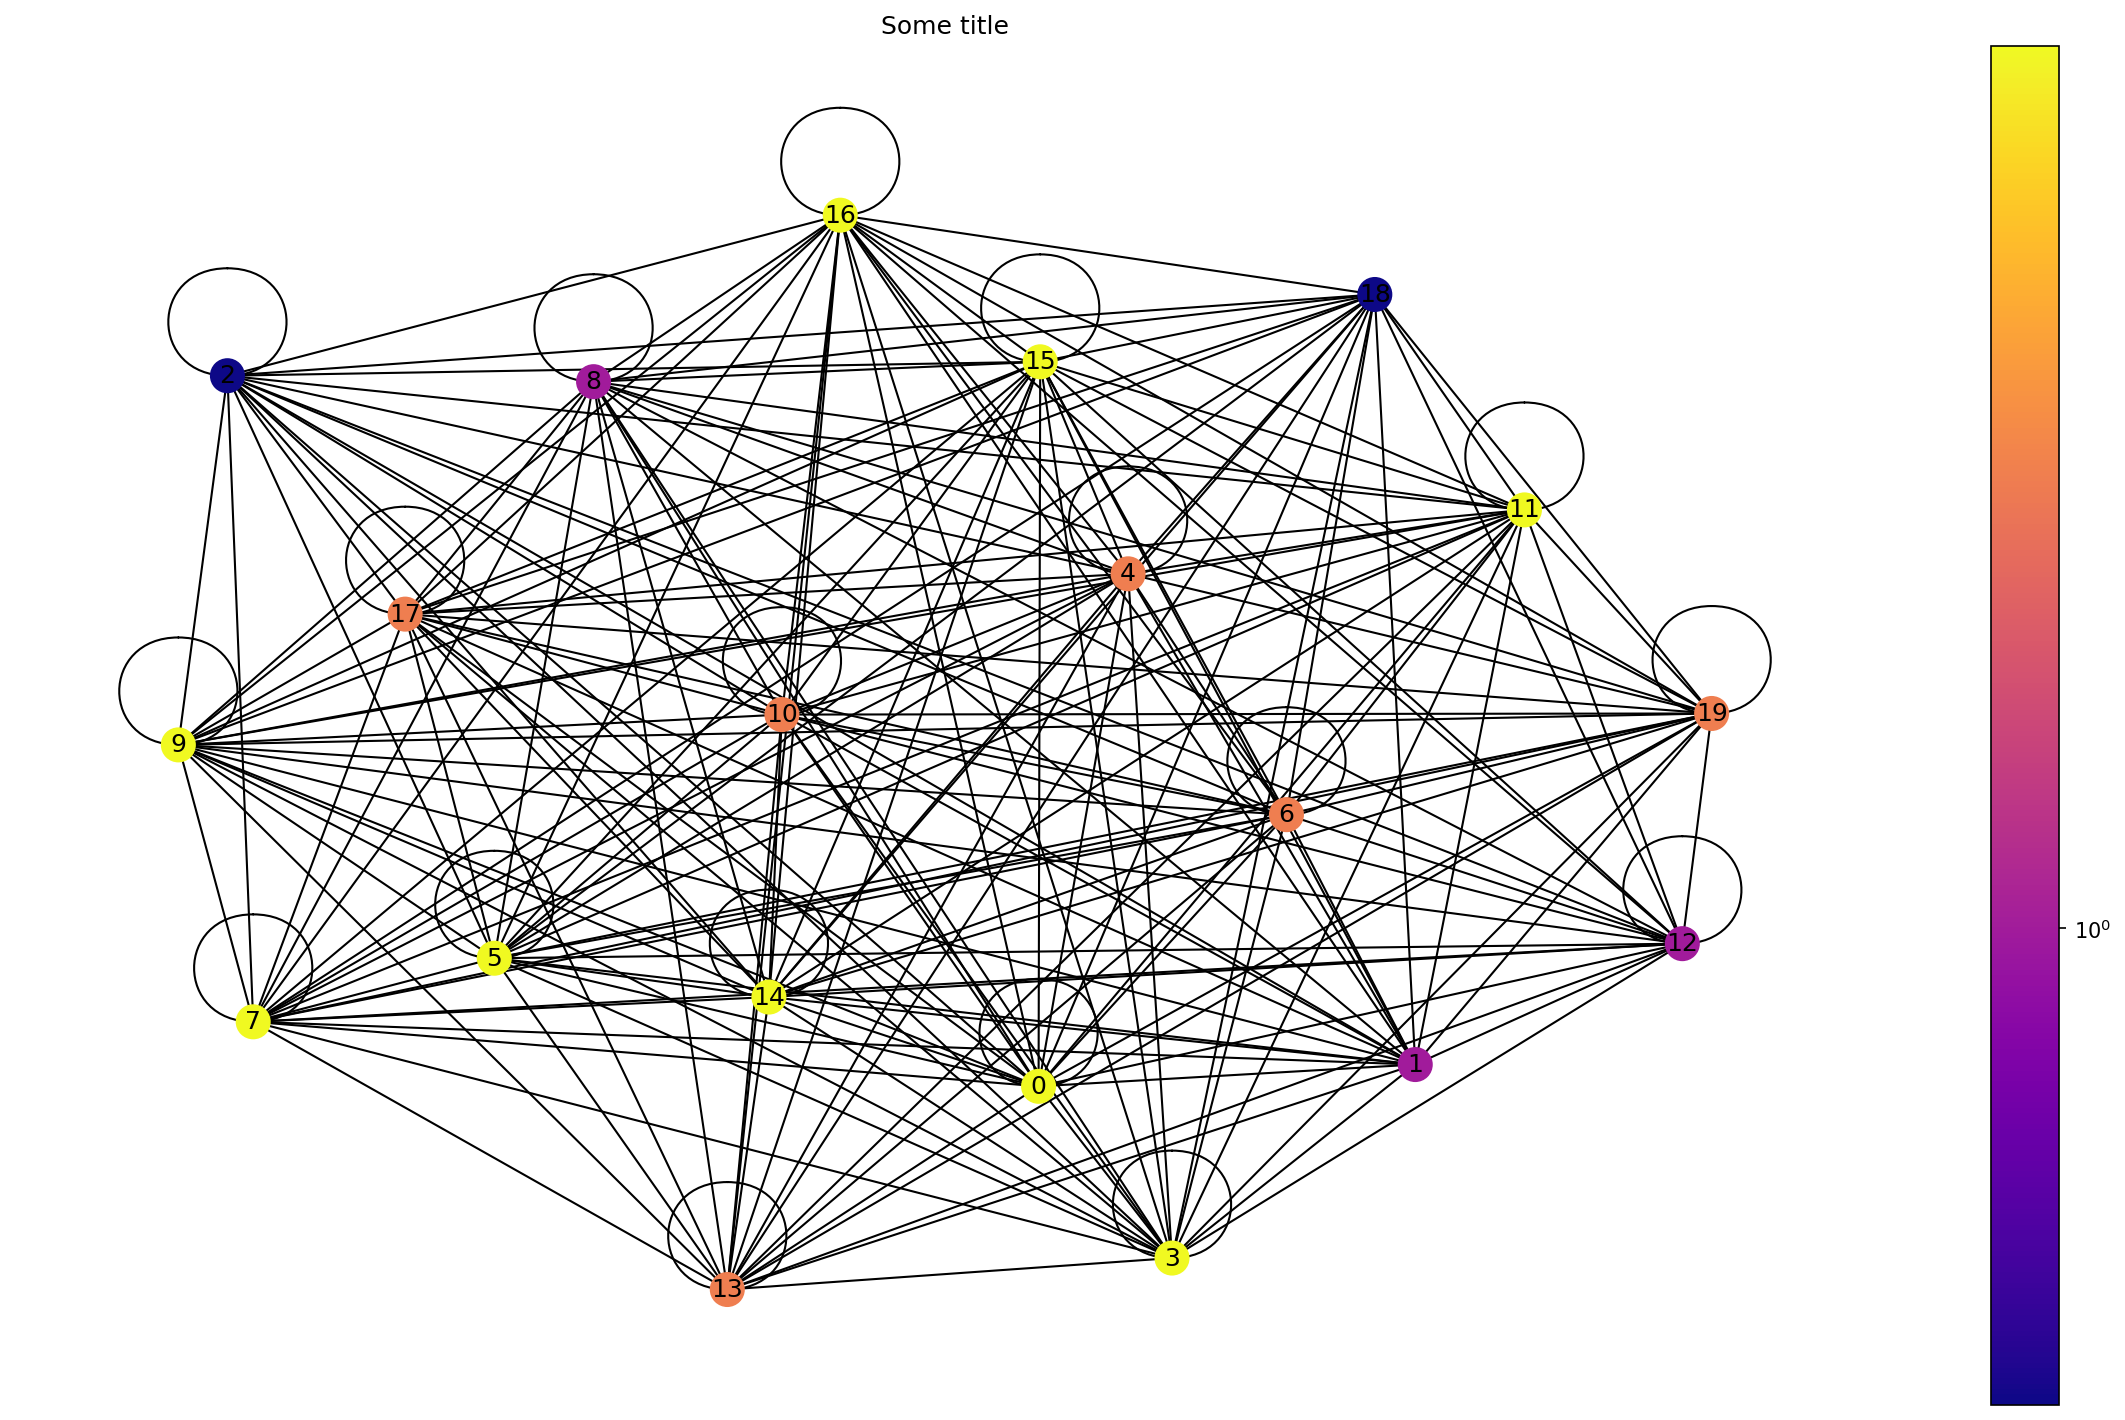

In [78]:
rcParams['figure.figsize'] = 20,12
degrees = nx.degree_centrality(G)
print(degrees)
eigen_centr = nx.eigenvector_centrality(G)
betweenees = nx.betweenness_centrality(G)
centrality(G, degrees, "Some title")

In [441]:
BA_lbert(4)

[(0, 3), (1, 3), (2, 3), (3, 3)]


AttributeError: 'numpy.int64' object has no attribute 'keys'

In [494]:
"""
1. Generamos un grafo con N nodos 
2. Elegimos nodo a cual agregar nuevo nodo (degree y probabilidad)
3. agregamos nodo 
repetir 2-3 hasta llegar al tamanio querido 
----------------------------------------------------------
INPUT: 
    - m (degree per node)
    - Numero de nodos final
OUTPUT:
    - Network con numero de nodos y degree deseado 
----------------------------------------------------------
Ejemplo: 
m = 3 (m>1)
para cada nodo, repetimos paso 2, 3 veces, para tener 3 conexiones. 
y se actualiza todo para cada nuevo edge / conexion que se hace. 
"""

rcParams['figure.figsize'] = 20,12

def BA_lbert(nodes):
    adjacency_matrix = np.random.randint(10, size=(nodes,nodes))
    np.fill_diagonal(adjacency_matrix, 0)
    graph = nx.from_numpy_matrix(adjacency_matrix)
    pos = nx.spring_layout(graph)
    degree_net = graph.degree()
    print(degree_net)
    #network = network.remove_edges_from(nx.selfloop_edges(network)) 
    red_dibujadita = nx.draw_networkx(
        graph, with_labels=True)


    plt.title("Barabási-Albert")
    plt.show()
    
    
    return graph, adjacency_matrix


def degrees_sum(graph:nx.graph.Graph) -> None:
    """returns the list of degrees and the sum of degrees"""
    ## degrees 
    degrees = np.array([x for x in dict(graph.degree()).values()])
    ## sum of degrees 
    sum_degrees = sum(degrees)
    return degrees, sum_degrees

def generate_degree_bin(degrees:np.array) -> np.array:
    """returns the binning of the degrees"""
    return np.cumsum(degrees)

def degree_sum_uniform(sum_of_degrees:int) -> float:
    """generates a random uniform value multiplied by the sum of degrees"""
    ## generate a random value 
    rand_val = np.random.uniform(0,1)
    ## return the sum of degrees * rand_val
    return sum_of_degrees * rand_val

def get_bin_index(random_value:float, bin_values:np.array) -> tuple:
    """Returns the start and end index of the bin the value corresponds"""
    ## iterate over the list with the index 
    for idx, i in enumerate(bin_values):
        ## condition 
        if random_value <= i:
            ## if the value of the index is less than 0 return 0
            start = idx-1 if (idx-1) >=0 else 0
            return (start, idx)

## update node to add 
def update_node_to_add(dic1,matrix):
    # Compute the degree with the matrix
    for i in range(0,len(matrix)):
        degree_for_node = matrix[i,:]
        dic1 = sum((degree_for_node > 0).astype(int))
        print(dic1)

    dic1 = degrees

    return dic1



    



[(0, 3), (1, 3), (2, 3), (3, 3)]


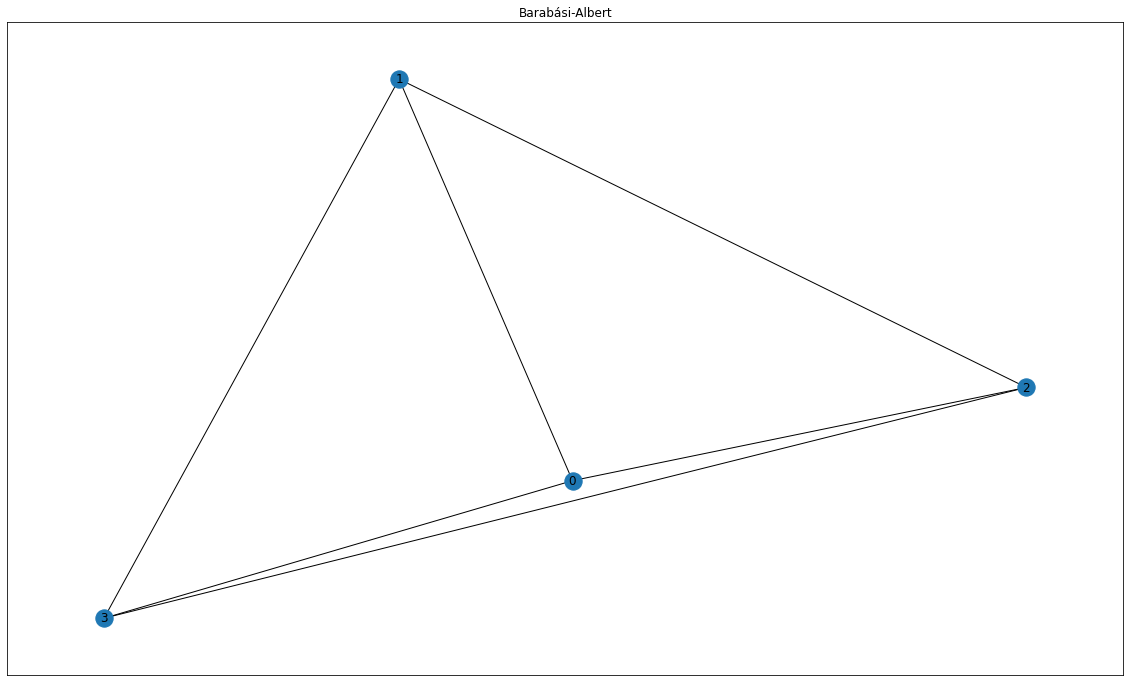

AttributeError: 'numpy.ndarray' object has no attribute 'degree'

In [495]:
    
#PLotear inicial
k,adjacency_M = BA_lbert(4)
#Calcular degrees y sacar dictionary

degrees, sum_degree = degrees_sum(adjacency_M) # degrees and their sum 
degree_bin = generate_degree_bin(degrees) ## bins of the degrees 
degree_random = degree_sum_uniform(sum_degree) ## random value * sum of degrees
val_bin = get_bin_index(degree_random, degree_bin)

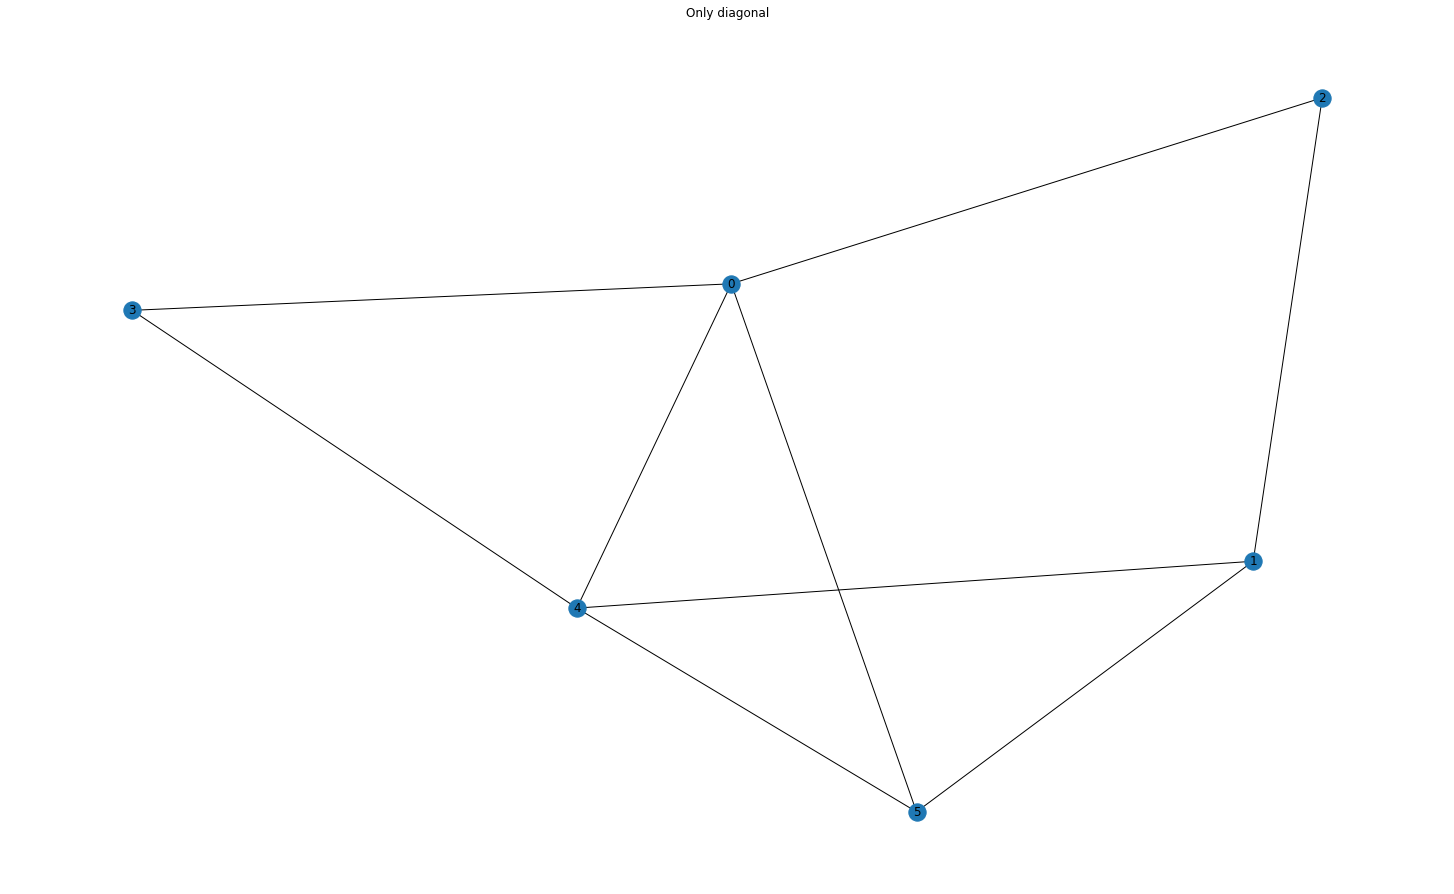

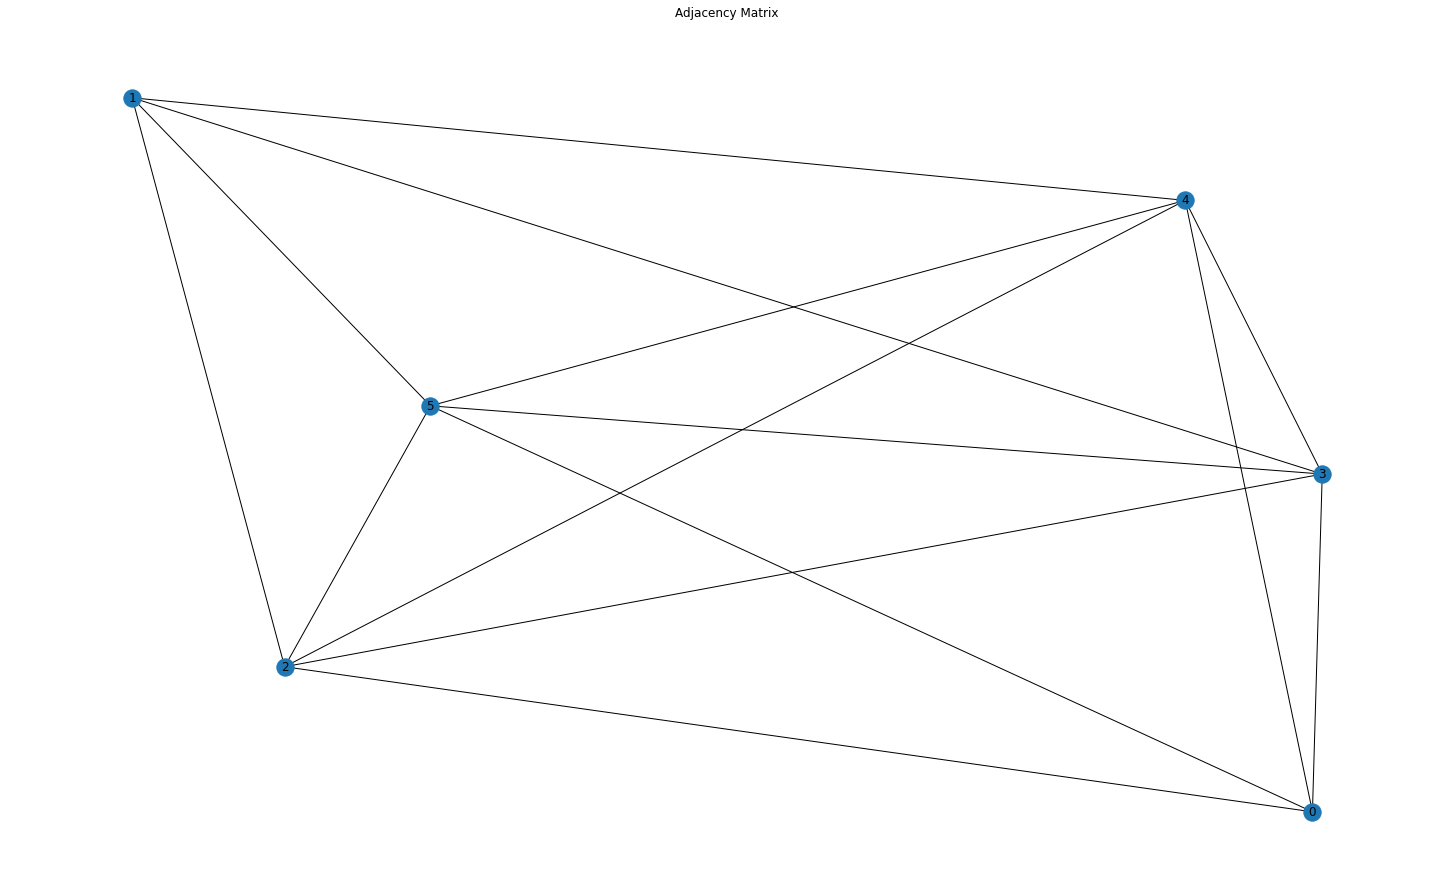

TypeError: 'dict' object is not callable

In [388]:
#Experiment to print the graph with directed and undirectd way

nodes = 6
adjacency_matrix = np.random.randint(low=0,high=2, size=(nodes,nodes))
np.fill_diagonal(adjacency_matrix, 0)
test = np.triu(adjacency_matrix)
graph = nx.from_numpy_array(test)
graph1 = nx.from_numpy_array(adjacency_matrix)
#print(dict(graph.degree()).values())
#np.fill_diagonal(adjacency_matrix, 0)
#assert sum(adjacency_matrix.diagonal()) == 0
nx.draw(graph,with_labels=True)
plt.title("Only diagonal")
plt.show()
nx.draw(graph1,with_labels=True)
plt.title("Adjacency Matrix")
plt.show()
def get_degree(x):
    a = dict(x.degree()).values()
    counter = [x for x in a]
    return counter

d1 = get_degree(graph)
print(sum(d1)/len(d1))
d2 = get_degree(graph1)
print(sum(d2)/len(d2))


In [392]:
b = np.random.randint(3,size=(3,3))
a[:b.shape[0],:b.shape[1]] = b
print(b)
print(a)

[[2 2 1]
 [1 1 2]
 [0 2 2]]
[[2. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [396]:
adjacency_matrix
np.triu(adjacency_matrix)

array([[0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0]])

In [398]:
dict(G.degree()).values()

TypeError: 'dict' object is not callable

In [399]:
type(G)

networkx.classes.graph.Graph

In [377]:
##
#dict = {}       # Degree dictionary

def degrees_sum(graph:nx.graph.Graph) -> None:
    """returns the list of degrees and the sum of degrees"""
    ## degrees 
    degrees = np.array([x for x in dict(graph.degree()).values()])
    ## sum of degrees 
    sum_degrees = sum(degrees)
    return degrees, sum_degrees

def generate_degree_bin(degrees:np.array) -> np.array:
    """returns the binning of the degrees"""
    return np.cumsum(degrees)

def degree_sum_uniform(sum_of_degrees:int) -> float:
    """generates a random uniform value multiplied by the sum of degrees"""
    ## generate a random value 
    rand_val = np.random.uniform(0,1)
    ## return the sum of degrees * rand_val
    return sum_of_degrees * rand_val

def get_bin_index(random_value:float, bin_values:np.array) -> tuple:
    """Returns the start and end index of the bin the value corresponds"""
    ## iterate over the list with the index 
    for idx, i in enumerate(bin_values):
        ## condition 
        if random_value <= i:
            ## if the value of the index is less than 0 return 0
            start = idx-1 if (idx-1) >=0 else 0
            return (start, idx)

## update node to add 
def update_node_to_add(dict,bin_index):
    
    pass






In [394]:
degrees, sum_degree = degrees_sum(G) # degrees and their sum 
degree_bin = generate_degree_bin(degrees) ## bins of the degrees 
degree_random = degree_sum_uniform(sum_degree) ## random value * sum of degrees
val_bin = get_bin_index(degree_random, degree_bin)

TypeError: 'dict' object is not callable

In [200]:
degrees, sum_degree

(array([19, 20, 21, 19, 20, 21, 19, 20, 21, 19, 19, 18, 21, 20, 18, 20, 20,
        19, 20, 20]),
 394)

In [201]:
degree_bin, degree_random

(array([ 19,  39,  60,  79,  99, 120, 139, 159, 180, 199, 218, 236, 257,
        277, 295, 315, 335, 354, 374, 394]),
 316.4675693231123)

In [202]:
val_bin

(15, 16)

In [425]:

d = {"1":1,"2": 5,"3": 4,"4": 5}

nuevo = update_node_to_add(d,adjacency_matrix)


4
3
2
4
3
3


In [411]:
print(nuevo)

3


## Test

TypeError: 'int' object is not iterable

## 4. Configuration Model (CM)

CM: different degree distributions: Poisson (ER), e.g. <k>=2, 4; power-law (SF) with different exponents, e.g. gamma=2.2, 2.7, 3.5



In [ ]:
## 2.